## Selecting Numerical Input
It is simple to select the feature in simple real valued input and output, such as using the Pearson's coefficient. But it becomes little complicated when the we have to use numerical input to determine categorical output.

The two mose used feature selection methods are Annova F test and Mutual information calssifier.

For this we will be using the diabities dataset.

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
def load_dataset(file):
    df= pd.read_csv(file, header = None)
    data = df.values
    X = data[:,:-1]
    y = data[:, -1]
    return X, y

#load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv'
X, y = load_dataset(url)
# Split the data into training and testing dataset
X_train, X_test, y_train , y_test = train_test_split(X, y , test_size= 0.33, random_state = 1)
# pring the size
print(f'Train : {X_train.shape , y_train.shape}')
print(f'Test: {X_test.shape, y_test.shape}')

Train : ((514, 8), (514,))
Test: ((254, 8), (254,))


#### Annova F test
The scikit-learn machine library provides an implementation of the ANOVA F-test in the f classif() function. This function can be used in a feature selection strategy, such as selectin the top k most relevant features (largest values) via the SelectKBest class.

Features: 0 16.527
Features: 1 131.326
Features: 2 0.042
Features: 3 1.415
Features: 4 12.779
Features: 5 49.210
Features: 6 13.377
Features: 7 25.126


<function matplotlib.pyplot.show(close=None, block=None)>

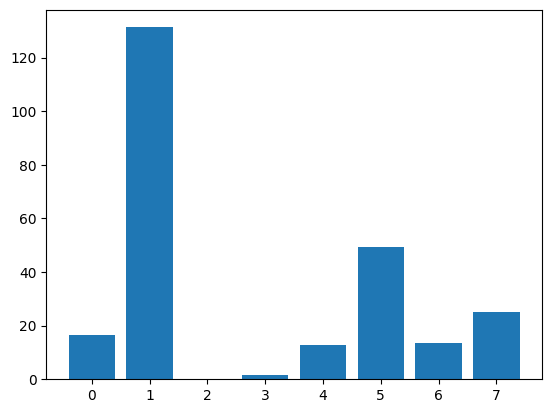

In [4]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from matplotlib import pyplot
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func= f_classif, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train, X_test, fs

X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
for i in range (len(fs.scores_)):
    print(f"Features: {i} {fs.scores_[i]:.3f}")

pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show

#### Using Mutual Information Classifier

Features: 0 16.527
Features: 1 131.326
Features: 2 0.042
Features: 3 1.415
Features: 4 12.779
Features: 5 49.210
Features: 6 13.377
Features: 7 25.126


<function matplotlib.pyplot.show(close=None, block=None)>

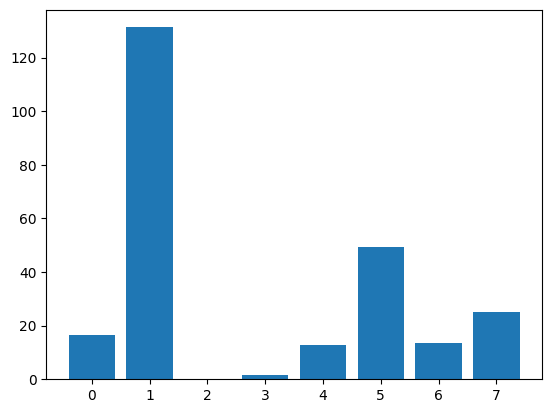

In [6]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from matplotlib import pyplot

def mutual_feature(X_train, y_train, X_test):
    mf = SelectKBest(score_func=mutual_info_classif, k='all')
    mf.fit(X_train, y_train)
    X_train_mf = mf.transform(X_train)
    X_test_mf = mf.transform(X_test)
    return X_train_mf, X_test_mf, mf

X_train_mf, X_test_mf, mf = mutual_feature(X_train, y_train, X_test)
# lets print the scores
for i in range(len(fs.scores_)):
    print(f"Features: {i} {fs.scores_[i]:.3f}")

pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show

#### Modeling Using the selected features

In [8]:
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
# evaluate the model
af = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, af)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 77.56


In [9]:
# evaluation of a model using 4 features chosen with anova f-test
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# load the dataset
def load_dataset(filename):
    # load the dataset as a pandas DataFrame
    data = read_csv(filename, header=None)
    # retrieve numpy array
    dataset = data.values
    # split into input (X) and output (y) variables
    X = dataset[:, :-1]
    y = dataset[:,-1]
    return X, y
# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select a subset of features
    fs = SelectKBest(score_func=f_classif, k=4)
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs
# load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv'
X, y = load_dataset(url)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# fit the model
model = LogisticRegression(solver='liblinear')
model.fit(X_train_fs, y_train)
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 78.74


In [10]:
# evaluation of a model using 4 features chosen with mutual information
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# load the dataset
def load_dataset(filename):
    # load the dataset as a pandas DataFrame
    data = read_csv(filename, header=None)
    # retrieve numpy array
    dataset = data.values
    # split into input (X) and output (y) variables
    X = dataset[:, :-1]
    y = dataset[:,-1]
    return X, y
# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select a subset of features
    fs = SelectKBest(score_func=mutual_info_classif, k=4)
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs
# load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv'
X, y = load_dataset(url)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# fit the model
model = LogisticRegression(solver='liblinear')
model.fit(X_train_fs, y_train)
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 77.56


#### Tuning the Number of Selected Features

In [12]:
import pandas as pd
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

def load_dataset(file):
    df = pd.read_csv(file, header= None)
    data = df.values
    X = data[:, :-1]
    y = data[:, -1]
    return X, y

url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv'
X, y = load_dataset(url)
#
cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state= 1)
#
model = LogisticRegression(solver='liblinear')
fs = SelectKBest(score_func=f_classif)
pipeline = Pipeline(steps=[('anova',fs), ('lr', model)])
# define the grid
grid = dict()
grid['anova__k'] = [i+1 for i in range(X.shape[1])]
# define the grid search
search = GridSearchCV(pipeline, grid, scoring='accuracy', n_jobs=-1, cv=cv)
# perform the search
results = search.fit(X, y)
# summarize best
print('Best Mean Accuracy: %.3f' % results.best_score_)
print('Best Config: %s' % results.best_params_)

Best Mean Accuracy: 0.770
Best Config: {'anova__k': 7}


1 features: Mean Accuracy=0.748, Std=0.048
2 features: Mean Accuracy=0.756, Std=0.042
3 features: Mean Accuracy=0.761, Std=0.044
4 features: Mean Accuracy=0.759, Std=0.042
5 features: Mean Accuracy=0.770, Std=0.041
6 features: Mean Accuracy=0.766, Std=0.042
7 features: Mean Accuracy=0.770, Std=0.042
8 features: Mean Accuracy=0.768, Std=0.040


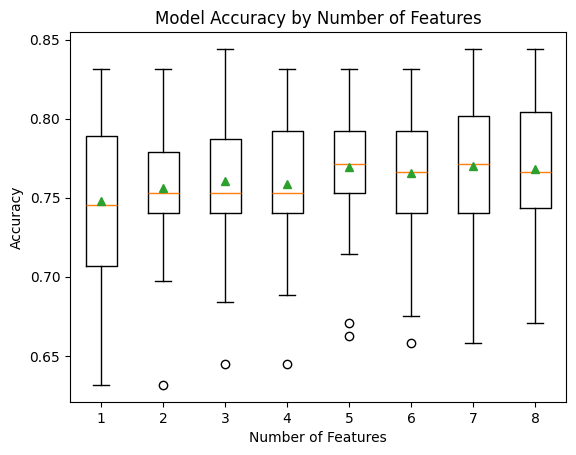

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pyplt
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif
from numpy import mean, std

# load the dataset
def load_dataset(filename):
    data = pd.read_csv(filename, header=None)
    dataset = data.values
    X = dataset[:, :-1]
    y = dataset[:, -1]
    return X, y

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

# define dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv'
X, y = load_dataset(url)

# define number of features to evaluate
num_features = [i+1 for i in range(X.shape[1])]

# enumerate each number of features
results = list()
for k in num_features:
    model = LogisticRegression(solver='liblinear')
    fs = SelectKBest(score_func=f_classif, k=k)
    pipeline = Pipeline(steps=[('anova', fs), ('lr', model)])
    scores = evaluate_model(pipeline, X, y)
    results.append(scores)
    print(f'{k} features: Mean Accuracy={mean(scores):.3f}, Std={std(scores):.3f}')

# plot model performance for comparison
pyplt.boxplot(results, tick_labels=num_features, showmeans=True)
pyplt.xlabel('Number of Features')
pyplt.ylabel('Accuracy')
pyplt.title('Model Accuracy by Number of Features')
pyplt.show()